In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing

### Load Dataset

In [89]:

df = pd.read_csv('data/ex.csv')

dataset_preview = df.copy()
# print(dataset_preview.tail())

dataset = df.copy()

In [90]:
def plot_dataset(dataset):
    for index, point in enumerate(dataset):
        plt.scatter(point[0], point[1], color="blue")
    plt.show()

# plot_dataset(dataset.copy().values)

### Split the data into train and test

Now split the dataset into a training set and a test set.

Use the test set in the final evaluation of our models.

In [91]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


### Split features from labels
Separate the target value, the "label", from the features. This label is the value that you will train the model to predict.

In [92]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('y')
test_labels = test_features.pop('y')

### A DNN regression

The previous section implemented linear models for single and multiple inputs.

This section implements single-input DNN model. The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

- The normalization layer.
- Two hidden, nonlinear, `Dense` layers using the `relu` onlinearity.
- A linear single-output layer.

It will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.

In [93]:
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0005),
                metrics=["accuracy"])
  return model

In [94]:
x = np.array(train_features['x'])
x_normalizer = preprocessing.Normalization(input_shape=[1,])
x_normalizer.adapt(x)

dnn_x_model = build_and_compile_model(x_normalizer)

dnn_x_model.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_8 (Normalizati (None, 800)               1601      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                51264     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 57,090
Trainable params: 55,489
Non-trainable params: 1,601
_________________________________________________________________


In [95]:
%%time
history = dnn_x_model.fit(
    train_features['x'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 8.01 s


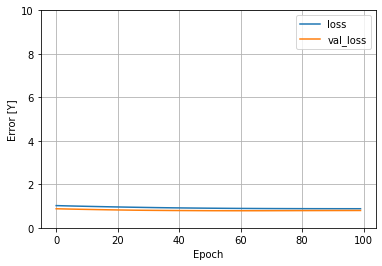

In [96]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Y]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

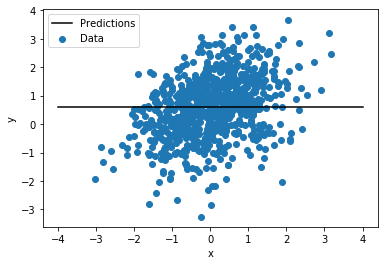

In [97]:
x = tf.linspace(-4.0, 4.0, 9)
y = dnn_x_model.predict(x)


def plot_dnn_x_model(x, y):
  plt.scatter(train_features['x'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

plot_dnn_x_model(x, y)
